<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/07_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random

In [ ]:
!git clone https://github.com/lmcanavals/acomplex.git

Cloning into 'acomplex'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 83 (delta 43), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (83/83), done.


In [ ]:
import acomplex.graphstuff as gs

In [ ]:
def randomG(n, m):
  G = []
  numvertices = [0]*n
  for _ in range(m):
    i = random.randint(0, n-1)
    numvertices[i] += 1
  for i in range(n):
    G.append(random.sample(range(n), numvertices[i]))

  return G

In [ ]:
G = randomG(20, 35)
G

[[],
 [13, 17],
 [2],
 [4],
 [],
 [18, 0, 5],
 [14, 2],
 [17, 12, 19],
 [11, 6, 1, 2],
 [13],
 [6],
 [5, 17, 9],
 [10],
 [1, 0],
 [11],
 [14, 11],
 [18],
 [16, 12, 15],
 [12],
 [1, 6, 17]]

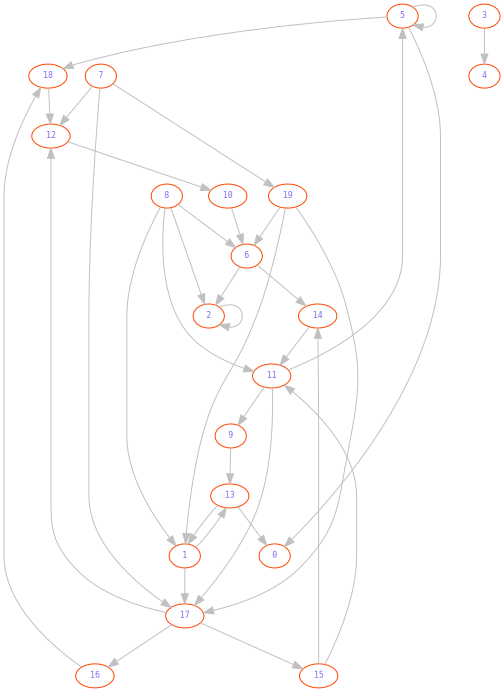

In [ ]:
gs.adjlShow(G, directed=True, layout="dot")

# Exhaustivo 1

In [ ]:
def exhaus(G):
  n = len(G)
  CFC = [-1]*n
  for x in range(n):
    CFC[x] = x
    for y in G[x]:
      if CFC[x] != CFC[y]:
        for z in range(n):
          if CFC[z] == CFC[y]:
            CFC[z] = CFC[x]

  return CFC

# Kosaraju

In [ ]:
def reverseGraph(G):
  n = len(G)
  Grev = [[] for _ in range(n)]

  for u in range(n):
    for v in G[u]:
      Grev[v].append(u)

  return Grev

In [ ]:
def dfs(G, s, lst, visited):
  stack = [[s, False]]
  while stack:
    elem = stack[-1]
    u, ok = elem
    if ok:
      if u not in lst:
        lst.append(u)
      stack.pop()
      continue
    elem[1] = True
    if visited[u]: continue
    visited[u] = True
    for v in reversed(G[u]):
      if not visited[v]:
        stack.append([v, False])

In [ ]:
def dfs(G, u, lst, visited):
  visited[u] = True
  for v in G[u]:
    if not visited[v]:
      dfs(G, v, lst, visited)

  lst.append(u)

In [ ]:
def kosaraju(G):
  n = len(G)
  visited = [False]*n
  f = []

  Grev = reverseGraph(G)            # step 1

  for u in range(n):                # step 2
    if not visited[u]:
      dfs(Grev, u, f, visited)

  visited = [False]*n               # step 3
  scc = []
  for u in reversed(f):
    if not visited[u]:
      cc = []
      dfs(G, u, cc, visited)
      scc.append(cc)

  return scc

In [ ]:
kosaraju(G)

[[4],
 [3],
 [2],
 [0],
 [16, 15, 17, 1, 13, 9, 11, 14, 6, 10, 12, 18, 5],
 [19],
 [7],
 [8]]

In [ ]:
kosaraju(G)

[[4],
 [3],
 [2],
 [0],
 [16, 15, 17, 1, 13, 9, 11, 14, 6, 10, 12, 18, 5],
 [19],
 [7],
 [8]]

In [ ]:
exhaus(G)

[19, 19, 19, 19, 19, 19, 6, 7, 19, 18, 18, 11, 12, 18, 14, 15, 18, 17, 18, 19]

# Tiempo empíricamente

In [ ]:
%time exhaus(G)

CPU times: user 141 µs, sys: 0 ns, total: 141 µs
Wall time: 149 µs


[19, 19, 19, 19, 19, 19, 6, 7, 19, 18, 18, 11, 12, 18, 14, 15, 18, 17, 18, 19]

In [ ]:
%time kosaraju(G)

CPU times: user 74 µs, sys: 0 ns, total: 74 µs
Wall time: 80.3 µs


[[11],
 [10],
 [7],
 [6],
 [3],
 [8, 18, 2, 17, 5, 13, 16, 4, 9, 1, 0],
 [19],
 [15],
 [12],
 [14]]

In [ ]:
%timeit exhaus(G)

10000 loops, best of 5: 57.7 µs per loop


In [ ]:
%timeit kosaraju(G)

10000 loops, best of 5: 24.9 µs per loop


In [ ]:
import time

def test(f, params, n):
  t = [0]*n
  for i in range(n):
    start = time.time()
    f(*params)
    t[i] = time.time() - start

  return np.median(t) * 1e6, np.min(t) * 1e6

In [ ]:
test(exhaus, [G], 10)

(113.8448715209961, 109.19570922851562)

In [ ]:
test(exhaus, [G], 10000)

(108.95729064941406, 54.35943603515625)

In [ ]:
test(kosaraju, [G], 10000)

(24.557113647460938, 23.603439331054688)

In [ ]:
Gx = randomG(1000, 1200)

In [ ]:
test(exhaus, [Gx], 100)

(88418.24531555176, 86854.45785522461)

In [ ]:
test(kosaraju, [Gx], 100)

(10586.023330688477, 10403.633117675781)

In [ ]:
Gy = randomG(10_000, 12_000)
test(kosaraju, [Gy], 10)

(1133389.2345428467, 1105490.6845092773)

# SCC counter

In [ ]:
def sccCounter(scc):
  counts = dict()
  for cc in scc:
    l = len(cc)
    if not l in counts:
      counts[l] = 0

    counts[l] += 1

  for l in counts:
    if l == 1:
      print(f"There are {counts[l]} single SCC")
    else:
      print(f"There are {counts[l]} SCC of size {l}")

In [ ]:
sccCounter(kosaraju(G))

There are 7 single SCC
There are 1 SCC of size 13


In [ ]:
G2 = randomG(10_000, 5000)
sccCounter(kosaraju(G2))

There are 9998 single SCC
There are 1 SCC of size 2


In [ ]:
G3 = randomG(10_000, 10_000)
sccCounter(kosaraju(G3))

There are 9976 single SCC
There are 1 SCC of size 2
There are 1 SCC of size 7
There are 1 SCC of size 15


In [ ]:
G4 = randomG(4_000, 10_000)
sccCounter(kosaraju(G4))

There are 798 single SCC
There are 1 SCC of size 7
There are 1 SCC of size 3195


In [ ]:
def exhaus(G):
  n = len(G)
  CFC = [-1]*n
  for x in range(n):
    CFC[x] = x
    for y in G[x]:
      if CFC[x] != CFC[y]:
        for z in range(n):
          if CFC[z] == CFC[y]:
            CFC[z] = CFC[x]

  return CFC